###CodeClause - Data Science Internship

###Task 2 : Speech Emotion Recognition.

Author : Anshu Kushwaha

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio
import warnings


import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint




warnings.filterwarnings("ignore")

C:\Users\kakad\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
Cremad = "C:\\Users\\kakad\\Downloads\\Crema"
Ravdess = "C:\\Users\\kakad\\Downloads\\Ravdess\\audio_speech_actors_01-24\\"
Savee = "C:\\Users\\kakad\\Downloads\\Savee\\AudioData\\AudioData"

In [ ]:
crema_dir = os.listdir(Cremad)

emotions = []
paths = []

for file in crema_dir:
    # storing file paths
    paths.append(Cremad+"/" + file)
    # storing file emotions
    part=file.split('_')
    emotions.append(part[2])
    
#  Creating dataframe out of lists       
emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
path_df = pd.DataFrame(paths, columns=['Path'])


Crema_df = pd.concat([emotion_df, path_df], axis=1)

e_dict={'DIS':'disgusted', 'HAP':'happy', 'SAD':'sad', 'FEA':'fear', 'ANG':'angry', 'NEU':'neutral'}
Crema_df["Emotions"]=Crema_df["Emotions"].apply(lambda x : e_dict[x])

del emotion_df
del path_df

Crema_df.head()

Emotions                                               Path
0      angry  C:\Users\kakad\Downloads\Crema/1001_DFA_ANG_XX...
1  disgusted  C:\Users\kakad\Downloads\Crema/1001_DFA_DIS_XX...
2       fear  C:\Users\kakad\Downloads\Crema/1001_DFA_FEA_XX...
3      happy  C:\Users\kakad\Downloads\Crema/1001_DFA_HAP_XX...
4    neutral  C:\Users\kakad\Downloads\Crema/1001_DFA_NEU_XX...

In [ ]:
Crema_df["Emotions"].value_counts()

angry        1271
disgusted    1271
fear         1271
happy        1271
sad          1271
neutral      1087
Name: Emotions, dtype: int64

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)
file_emotion = []

file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(Ravdess +"/"+ i)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file is emotion
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# int to emotion
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusted', 8:'surprised'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  C:\Users\kakad\Downloads\Ravdess\audio_speech_...
1  neutral  C:\Users\kakad\Downloads\Ravdess\audio_speech_...
2  neutral  C:\Users\kakad\Downloads\Ravdess\audio_speech_...
3  neutral  C:\Users\kakad\Downloads\Ravdess\audio_speech_...
4     calm  C:\Users\kakad\Downloads\Ravdess\audio_speech_...

In [ ]:
Ravdess_df["Emotions"].value_counts()

calm         192
happy        192
sad          192
angry        192
fear         192
disgusted    192
surprised    192
neutral       96
Name: Emotions, dtype: int64

In [ ]:
# used "next" with "walk" cause "os.listdir" gives error 
directory_list = next(os.walk("C:\\Users\\kakad\\Downloads\\Savee\\AudioData\\AudioData"))[1]
file_emotion = []

file_path = []
for i in directory_list:
    actor = os.listdir(Savee +"/"+ i)
    for file in actor:       
        file_emotion.append(file[:-6])
        file_path.append(Savee+"/" + i + '/' + file)
        
# list to dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Combining 
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# letter to full emotion
Savee_df.Emotions.replace({'a':'angry', 'd':'disgusted', 'f':'fear', 'h':'happy', 'n':'neutral', 'sa':'sad' , 'su':'surprised'}, inplace=True)
Savee_df.head()

Emotions                                               Path
0    angry  C:\Users\kakad\Downloads\Savee\AudioData\Audio...
1    angry  C:\Users\kakad\Downloads\Savee\AudioData\Audio...
2    angry  C:\Users\kakad\Downloads\Savee\AudioData\Audio...
3    angry  C:\Users\kakad\Downloads\Savee\AudioData\Audio...
4    angry  C:\Users\kakad\Downloads\Savee\AudioData\Audio...

In [ ]:
# creating Dataframe using above 3 dataframes.
df = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
df.to_csv("data.csv",index=False)
df.head()

Emotions                                               Path
0  neutral  C:\Users\kakad\Downloads\Ravdess\audio_speech_...
1  neutral  C:\Users\kakad\Downloads\Ravdess\audio_speech_...
2  neutral  C:\Users\kakad\Downloads\Ravdess\audio_speech_...
3  neutral  C:\Users\kakad\Downloads\Ravdess\audio_speech_...
4     calm  C:\Users\kakad\Downloads\Ravdess\audio_speech_...

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df["Emotions"].value_counts()

happy        1523
sad          1523
angry        1523
fear         1523
disgusted    1523
neutral      1303
surprised     252
calm          192
Name: Emotions, dtype: int64

<AxesSubplot:xlabel='Emotions', ylabel='count'>

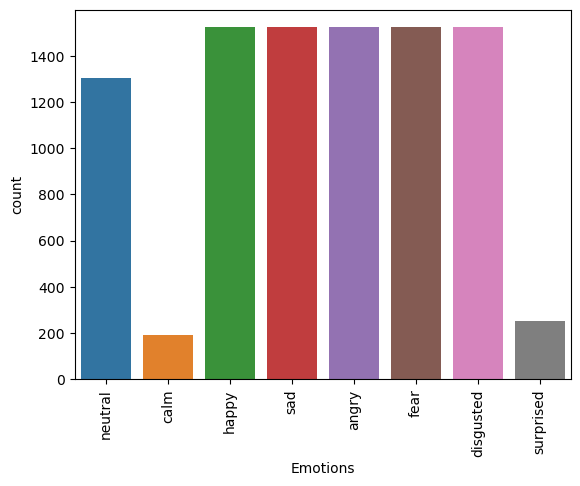

In [ ]:
import matplotlib.pyplot as plt
plt.xticks( rotation='vertical')
sns.countplot(df["Emotions"])

In [ ]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

In [ ]:
emot=["disgusted","fear","sad","happy","angry","neutral","surprised","calm"]

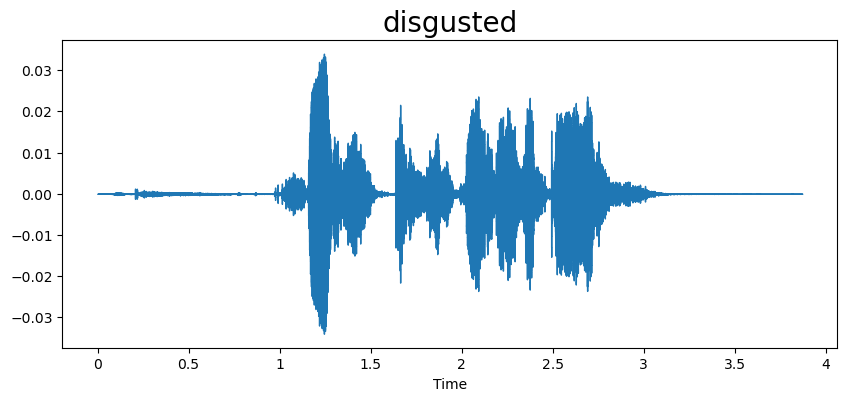

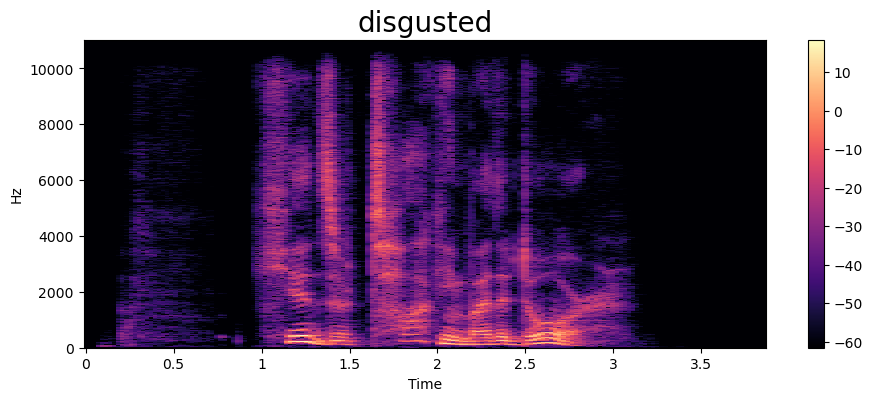

In [ ]:
emotion=emot[0]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

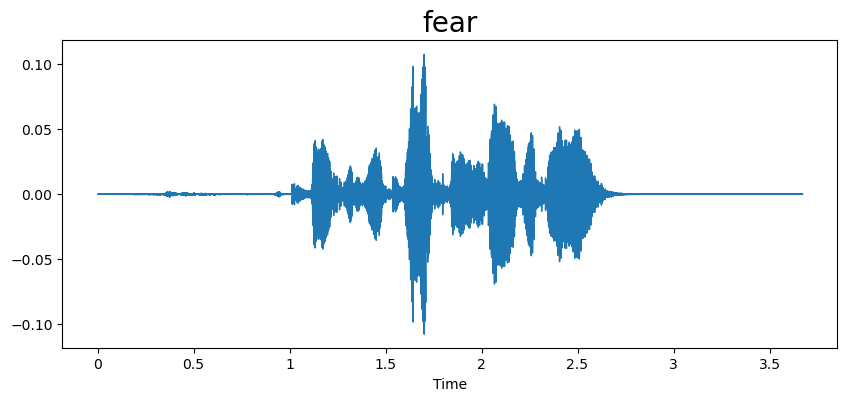

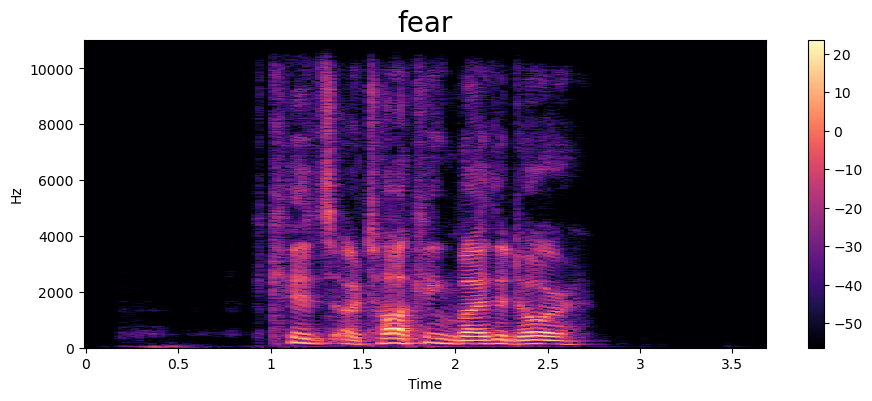

In [ ]:
emotion=emot[1]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

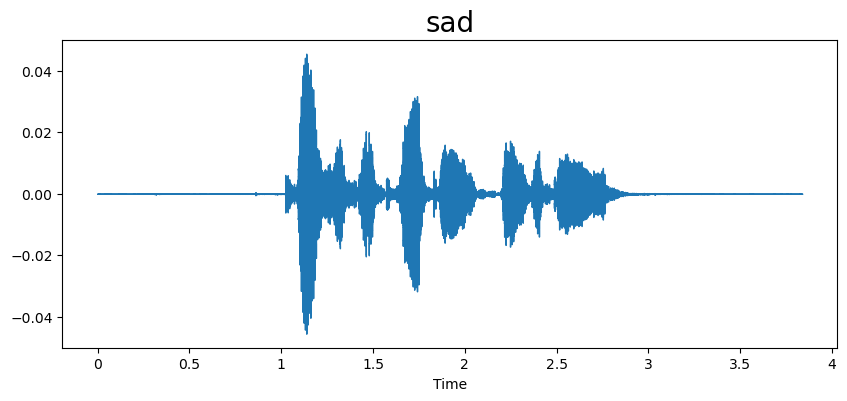

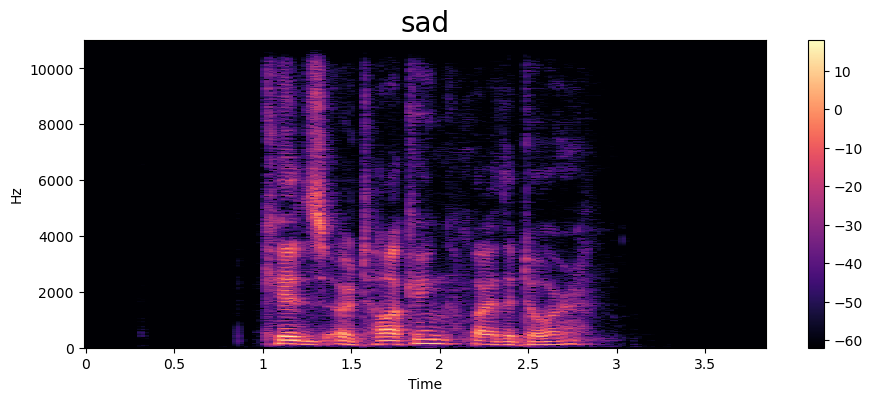

In [ ]:
emotion=emot[2]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

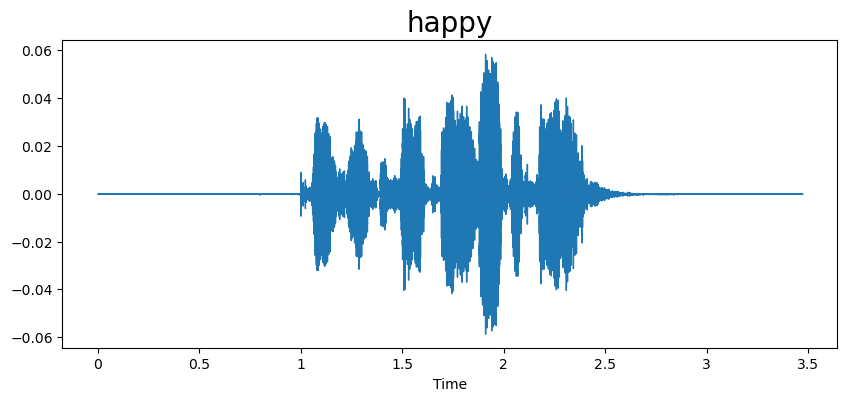

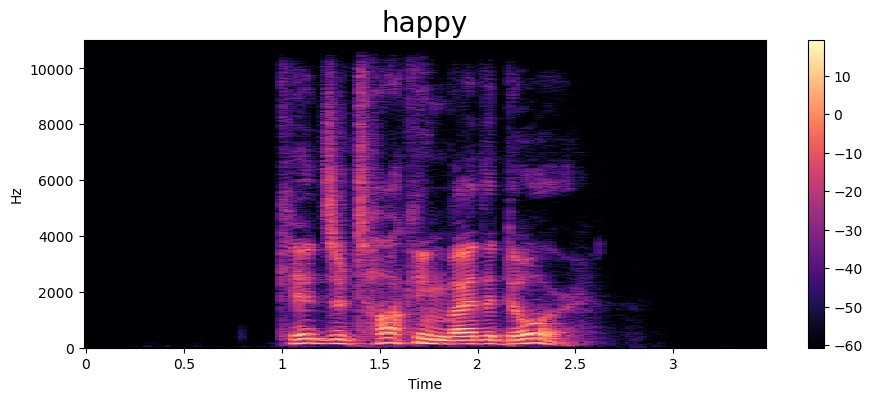

In [ ]:
emotion=emot[3]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

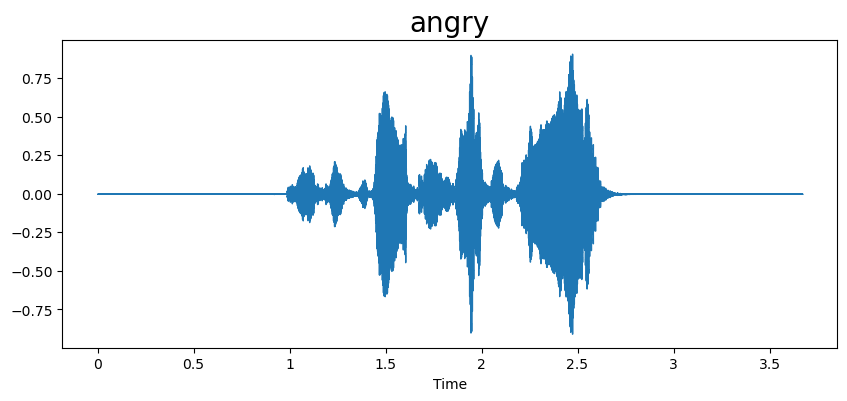

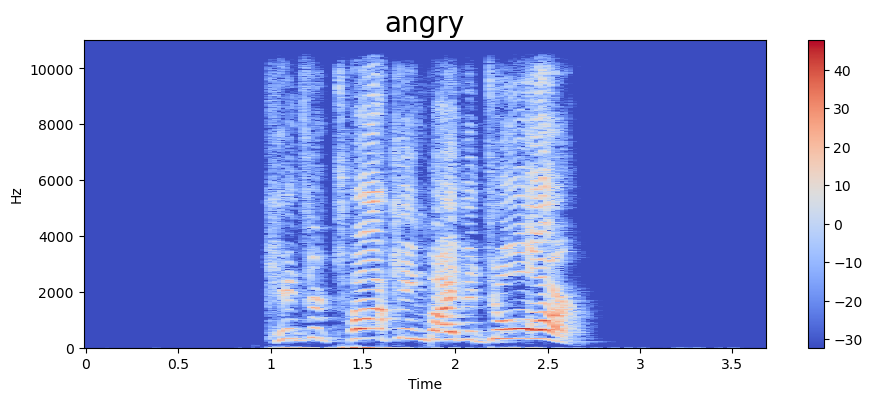

In [ ]:
emotion=emot[4]
path=np.array(df["Path"][df["Emotions"]==emotion])[100]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

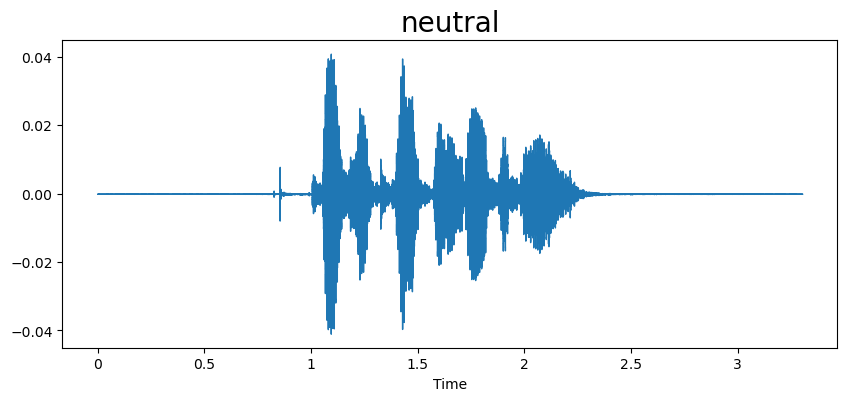

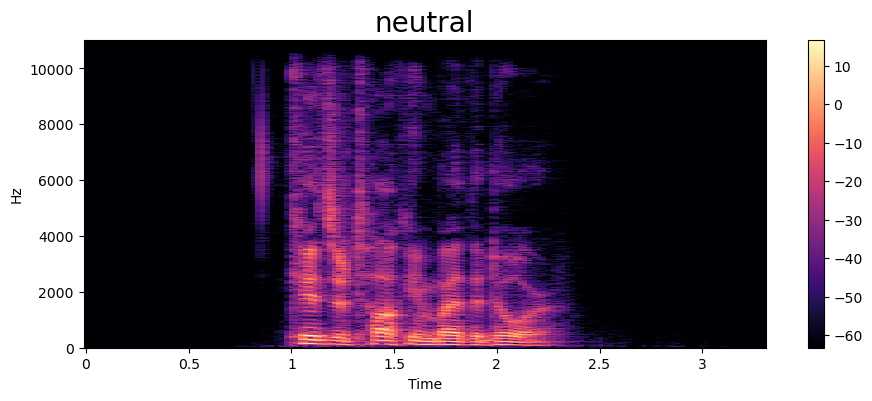

In [ ]:
emotion=emot[5]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

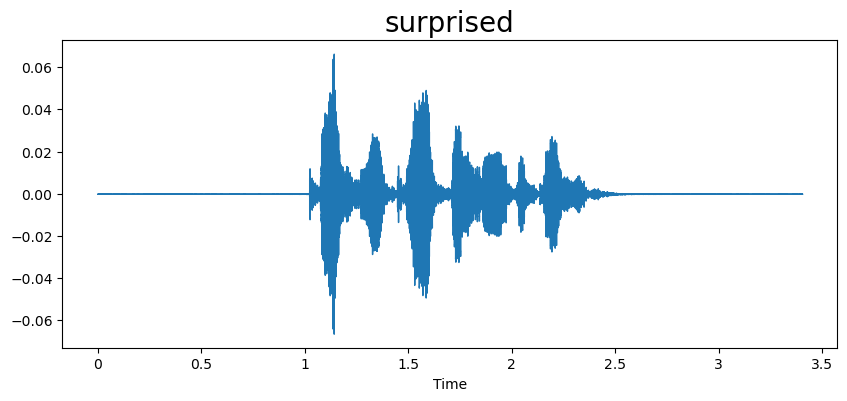

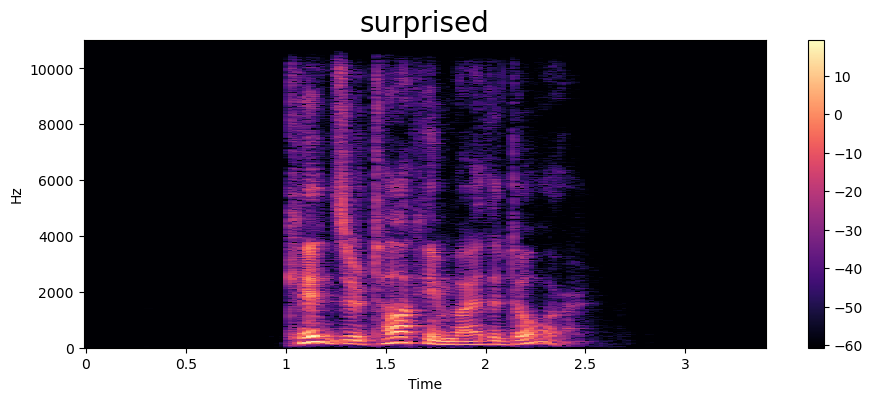

In [ ]:
emotion=emot[6]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

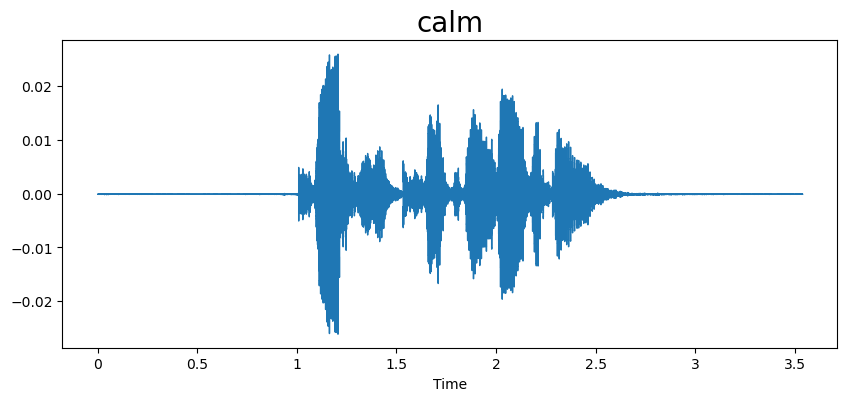

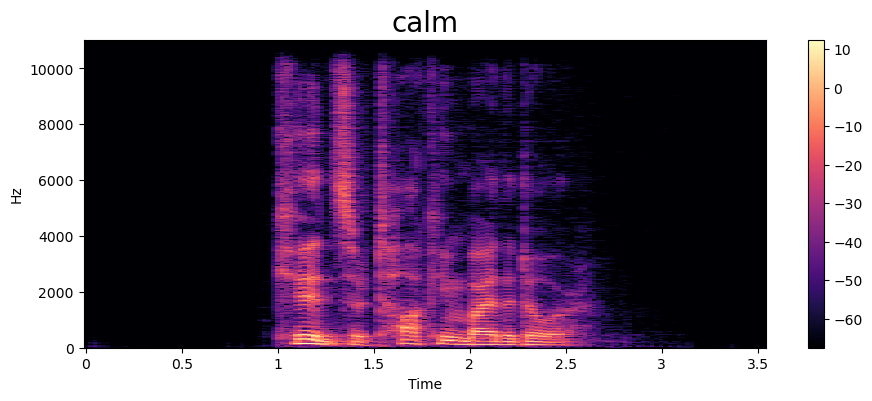

In [ ]:
emotion=emot[7]
path=np.array(df["Path"][df["Emotions"]==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [ ]:
def noise(data):
    noise_amp = 0.030*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

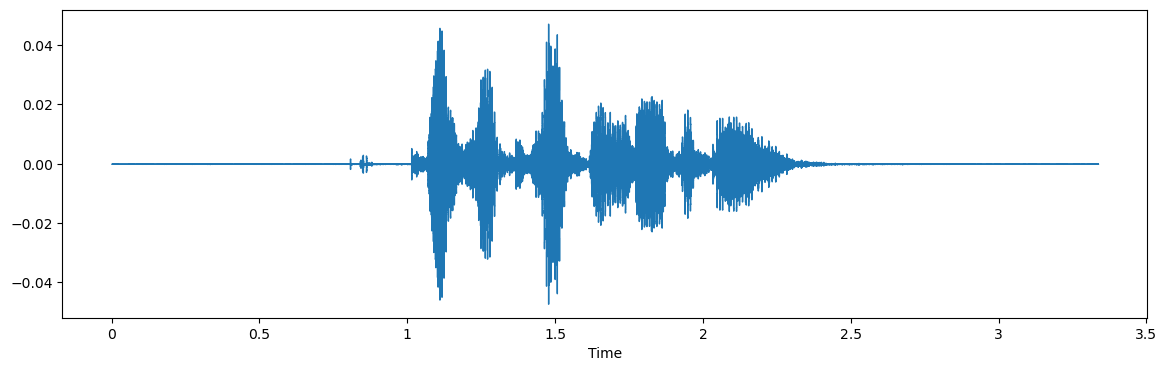

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

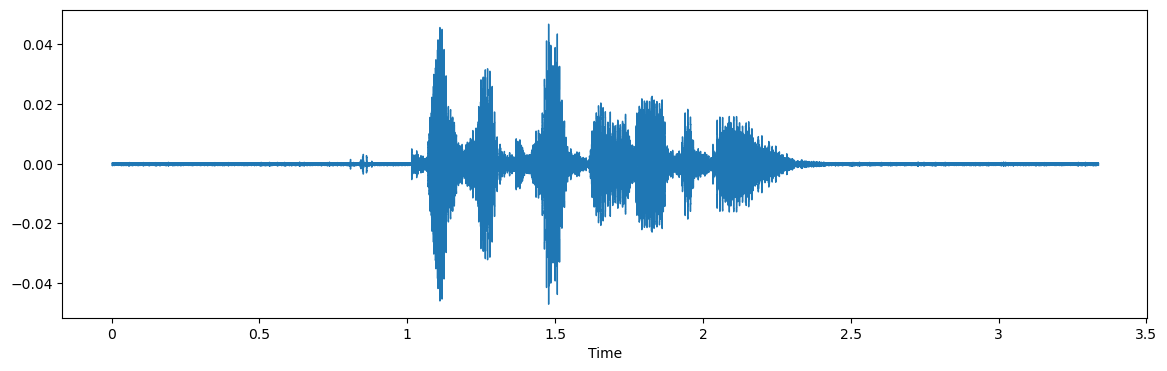

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

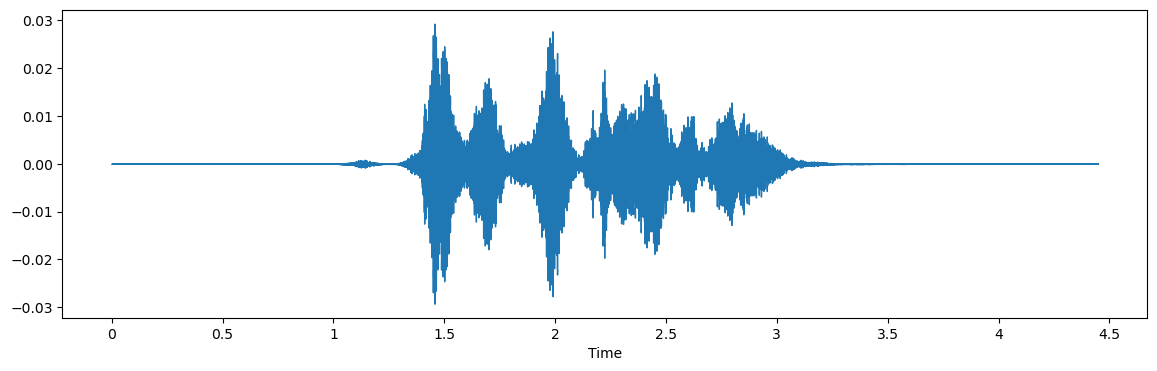

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

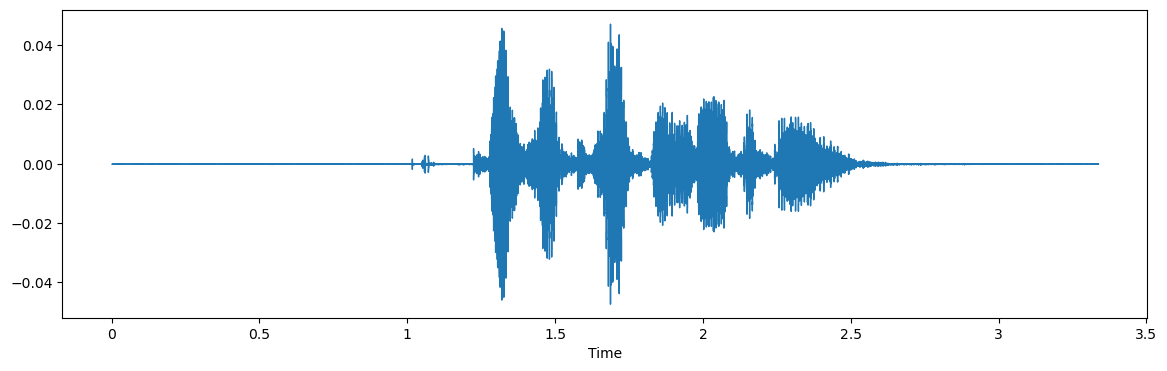

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

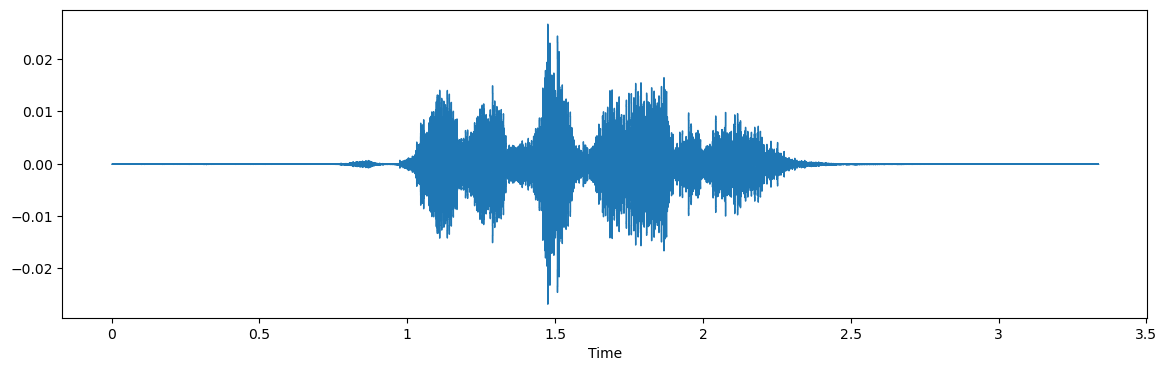

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)